In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/kaggle/input/sentnob/sentnob_train.csv")
df_val = pd.read_csv("/kaggle/input/sentnob/sentnob_val.csv")

In [3]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [4]:
df_train.dropna(inplace=True)

In [5]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [6]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [7]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [8]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [10]:
df_train['Data']

0        মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...
1        এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...
2                                ভাই আপনার কথাই যাদু রয়েছে
3                              উওরটা আমার অনেক ভাল লেগেছে 
4        আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...
                               ...                        
12570    বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...
12571    আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...
12572    ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...
12573    বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...
12574           বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু
Name: Data, Length: 12575, dtype: object

In [11]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [12]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [13]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [14]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.1 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=414217541ee20113752411c42ae763bed38374d82b5d829d4c4f6c6ee6dbad69
  Stored in directory: /roo

In [15]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [16]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [17]:
print(trn)

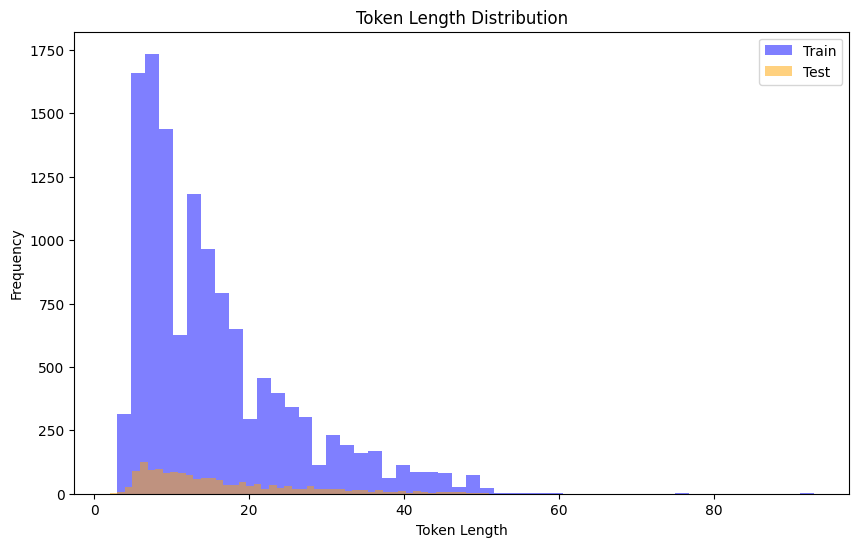

In [18]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [19]:
model = t.get_classifier()

In [20]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [21]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [22]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 937s 579ms/step - loss: 0.9324 - accuracy: 0.5528 - val_loss: 0.7796 - val_accuracy: 0.6592
Epoch 2/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.7813 - accuracy: 0.6550 - val_loss: 0.7384 - val_accuracy: 0.6803
Epoch 3/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.6816 - accuracy: 0.7058 - val_loss: 0.7475 - val_accuracy: 0.6528
Epoch 4/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.5890 - accuracy: 0.7572 - val_loss: 0.7109 - val_accuracy: 0.6981
Epoch 5/10
1572/1572 [==============================] - 907s 577ms/step - loss: 0.5016 - accuracy: 0.7987 - val_loss: 0.7704 - val_accuracy: 0.6956
Epoch 6/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.4106 - accuracy: 0.8379 - val_loss: 0.7702 - val_accuracy: 0.7179
Epoch 7/10
1572/1572 [===========================

In [23]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [24]:
classes=t.get_classes()

In [25]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 12s 178ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78       590
     Neutral       0.50      0.53      0.51       354
    Positive       0.75      0.75      0.75       623

    accuracy                           0.71      1567
   macro avg       0.68      0.68      0.68      1567
weighted avg       0.71      0.71      0.71      1567



In [26]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [27]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)
